In [36]:
import gensim
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer

# Sentence embeddings

In [90]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [91]:
df1 = pd.read_csv('nikol.csv')
df2 = pd.read_csv('kocharyan.csv')
df3 = pd.read_csv('marukyan.csv')
df4 = pd.read_csv('mirzoyan.csv')

df = pd.concat([df1, df2, df3, df4])


In [92]:
tweets = df['Tweets'].tolist()
embeddings = embed(tweets)

In [119]:
embeddings = np.array(embeddings)
print(embeddings[:1000])

[[-0.05749603 -0.06370906 -0.02388295 ... -0.01151615 -0.04116247
  -0.06913701]
 [-0.05786803 -0.07198022  0.0538093  ...  0.00618963 -0.07337327
  -0.03160325]
 [-0.01881033 -0.01926418 -0.07116292 ... -0.01645349 -0.07625274
  -0.05510753]
 ...
 [-0.01463063  0.04081714 -0.07702968 ... -0.02167633  0.01375756
  -0.08448039]
 [ 0.0249112   0.05653744 -0.01344463 ... -0.08188791 -0.01607449
  -0.03711983]
 [ 0.02527479  0.00703421  0.01406473 ...  0.04730496 -0.06167349
  -0.07000337]]


In [120]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

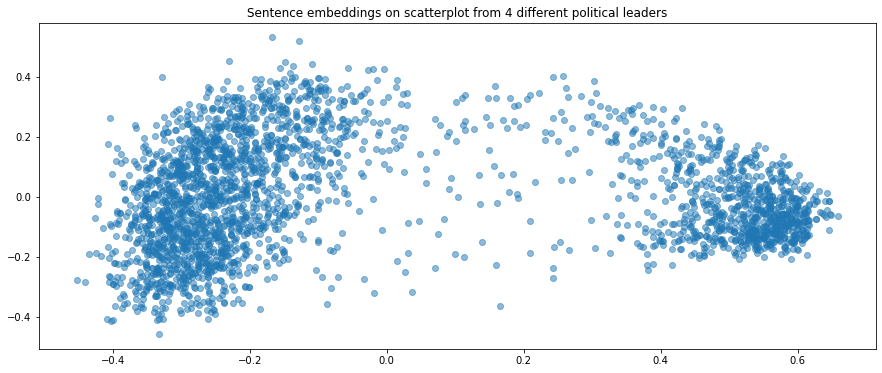

In [121]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title("Sentence embeddings on scatterplot from 4 different political leaders")
plt.show()


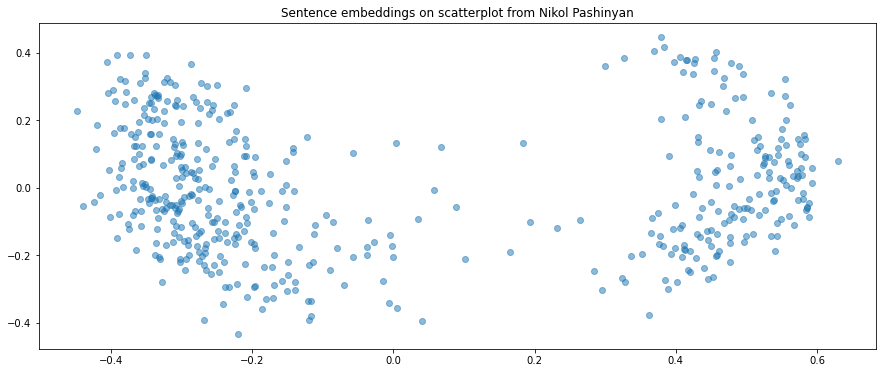

In [225]:
tweets = df1['Tweets'].tolist()
embeddings_ = embed(tweets)
embeddings_ = np.array(embeddings_)
pca = PCA(n_components=2)
embeddings_n = pca.fit_transform(embeddings_)
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(embeddings_n[:, 0], embeddings_n[:, 1], alpha=0.5)
plt.title("Sentence embeddings on scatterplot from Nikol Pashinyan")
plt.show()

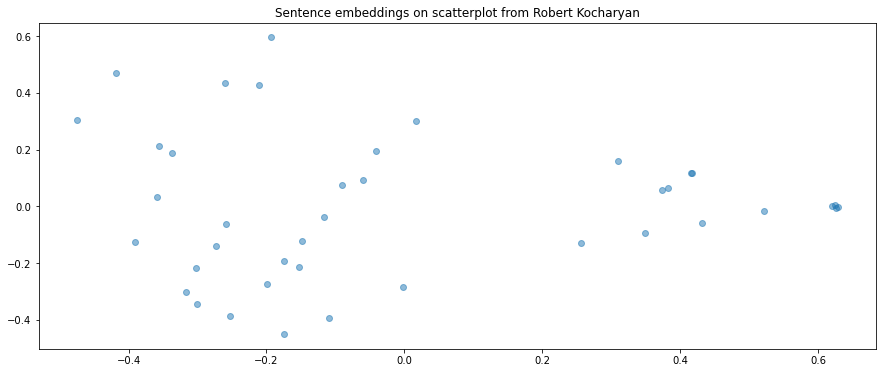

In [227]:
tweets = df2['Tweets'].tolist()
embeddings_ = embed(tweets)
embeddings_ = np.array(embeddings_)
pca = PCA(n_components=2)
embeddings_n = pca.fit_transform(embeddings_)
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(embeddings_n[:, 0], embeddings_n[:, 1], alpha=0.5)
plt.title("Sentence embeddings on scatterplot from Robert Kocharyan")
plt.show()

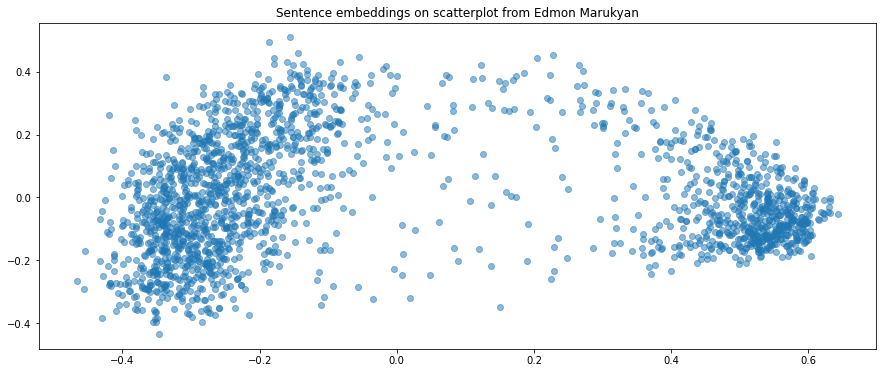

In [229]:
tweets = df3['Tweets'].tolist()
embeddings_ = embed(tweets)
embeddings_ = np.array(embeddings_)
pca = PCA(n_components=2)
embeddings_n = pca.fit_transform(embeddings_)
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(embeddings_n[:, 0], embeddings_n[:, 1], alpha=0.5)
plt.title("Sentence embeddings on scatterplot from Edmon Marukyan")
plt.show()

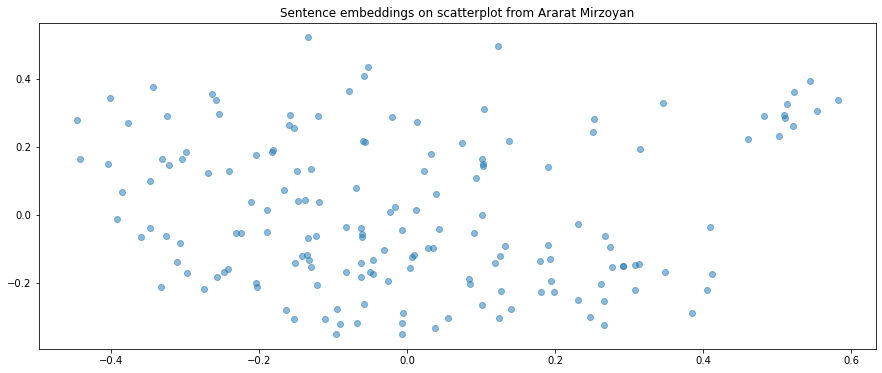

In [230]:
tweets = df4['Tweets'].tolist()
embeddings_ = embed(tweets)
embeddings_ = np.array(embeddings_)
pca = PCA(n_components=2)
embeddings_n = pca.fit_transform(embeddings_)
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(embeddings_n[:, 0], embeddings_n[:, 1], alpha=0.5)
plt.title("Sentence embeddings on scatterplot from Ararat Mirzoyan")
plt.show()

In [ ]:
tweets = df1['Tweets'].tolist()
embeddings_ = embed(tweets)

# Network Analysis

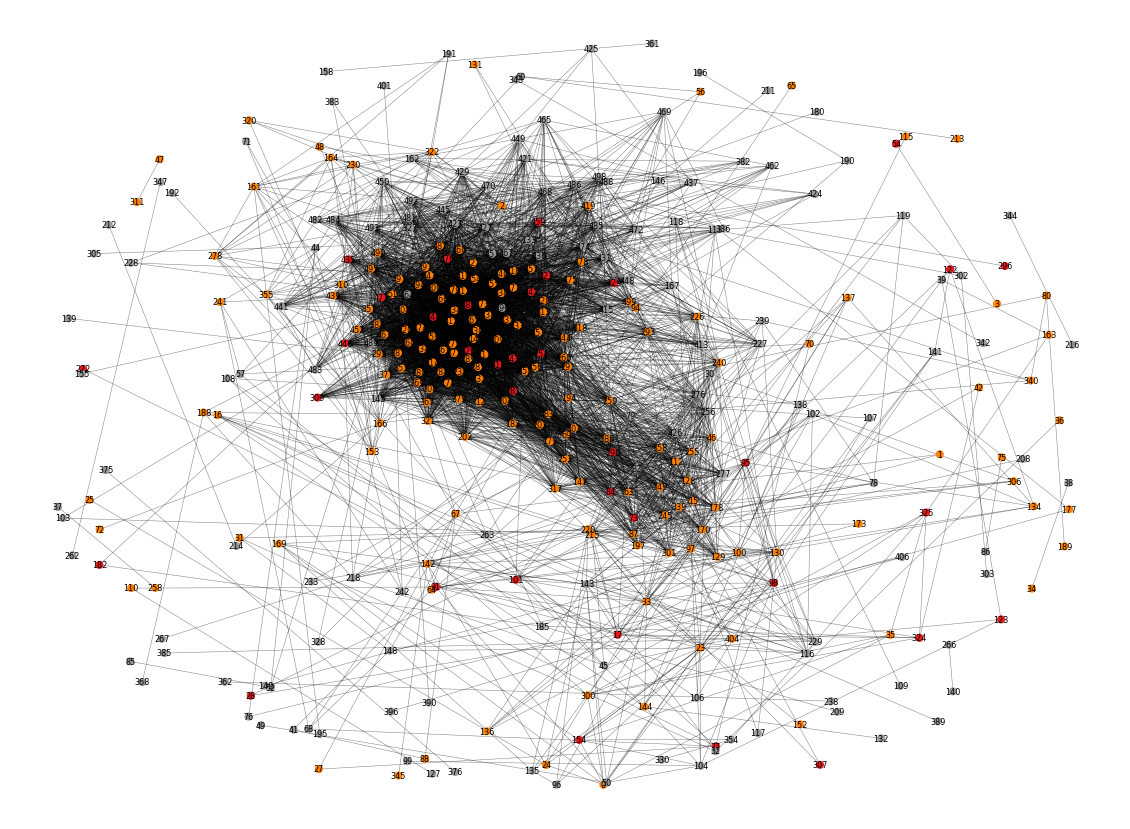

In [199]:
G = nx.Graph()
edge_indices = [] 
for i, tweet_i in enumerate(df1['Tweets']):
    for j, tweet_j in enumerate(df1['Tweets']):
        if i != j:
            similarity = cosine_sim[i, j]
            if similarity > threshold:
                G.add_edge(i, j, weight=similarity)
                edge_indices.extend([i, j])

edge_indices = list(set(edge_indices))  
cosine_sim_subset = cosine_sim[edge_indices][:, edge_indices]
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim_subset)
node_colors = [kmeans.labels_[i] for i in range(len(edge_indices))]

fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.axis("off")
plt.savefig("nikol1.png")
plt.show()


In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df1["Tweets"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
most_common_topic = pd.Series(kmeans.labels_).value_counts().idxmax()

#print(f"The most common topic in the tweets is cluster {most_common_topic}.")

In [201]:
cluster_index = kmeans.labels_ == 2
tweets_in_cluster = df1[cluster_index]['Tweets']

In [215]:
stop_words = ["english", "https", "co", "the", "of", "in", "amp", "to", "and", "with", "for", "is", "my", "via", "on", "our","that", "at", "in", "an", "it"]
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(tweets_in_cluster)

word_counts = np.asarray(X.sum(axis=0)).squeeze()
df_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "count": word_counts})
df_word_counts_sorted = df_word_counts.sort_values(by="count", ascending=False)

# print the top 10 words in the cluster
print("The most c1ommon words in the tweets in the cluster:")
print(df_word_counts_sorted.head(10))

The most common words in the tweets in the cluster:
           word  count
177     armenia     61
1502         we     42
3199   փաշինյան     36
2905      նիկոլ     30
2465         եմ     28
1518       will     27
1099  president     25
1846         на     23
183    armtimes     22
2774        հետ     18


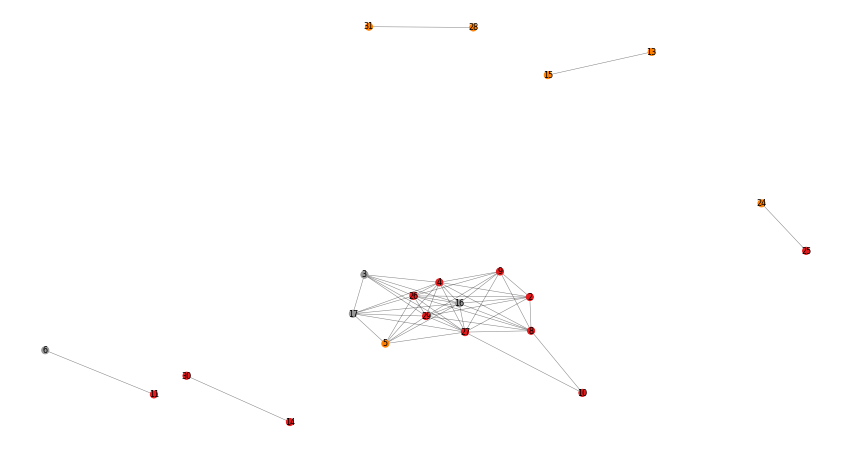

In [216]:
tweets = df2['Tweets'].tolist()
embeddings_ = embed(tweets)

cosine_sim = cosine_similarity(embeddings_)
threshold = 0.5

G = nx.Graph()
edge_indices = []
for i, tweet_i in enumerate(df2['Tweets']):
    for j, tweet_j in enumerate(df2['Tweets']):
        if i != j:
            similarity = cosine_sim[i, j]
            if similarity > threshold:
                G.add_edge(i, j, weight=similarity)
                edge_indices.extend([i, j])
edge_indices = list(set(edge_indices))
cosine_sim_subset = cosine_sim[edge_indices][:, edge_indices]
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim_subset)

node_colors = [kmeans.labels_[i] for i in range(len(edge_indices))]
fig, ax = plt.subplots(figsize=(15, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.axis("off")
plt.savefig("kocharyan.png")
plt.show()

In [218]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df2["Tweets"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
most_common_topic = pd.Series(kmeans.labels_).value_counts().idxmax()

#print(f"The most common topic in the tweets is cluster {most_common_topic}.")

The most common topic in the tweets is cluster 2.


In [219]:
cluster_index = kmeans.labels_ == 2
tweets_in_cluster = df2[cluster_index]['Tweets']
#print(tweets_in_cluster)

In [220]:
stop_words = ["english", "https", "co", "the", "of", "in", "amp", "to", "and", "with", "for", "is", "my", "via", "on", "our","that", "at", "in", "an", "it"]

vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(tweets_in_cluster)
word_counts = np.asarray(X.sum(axis=0)).squeeze()
df_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "count": word_counts})
df_word_counts_sorted = df_word_counts.sort_values(by="count", ascending=False)

# print the top 10 words in the cluster
print("The most common words in the tweets in the cluster:")
print(df_word_counts_sorted.head(10))

The most common words in the tweets in the cluster:
          word  count
210     robert     10
150  kocharyan      8
23     armenia      7
207   republic      7
69         day      7
259         we      6
194  president      6
29     artsakh      6
211     second      5
189     people      4


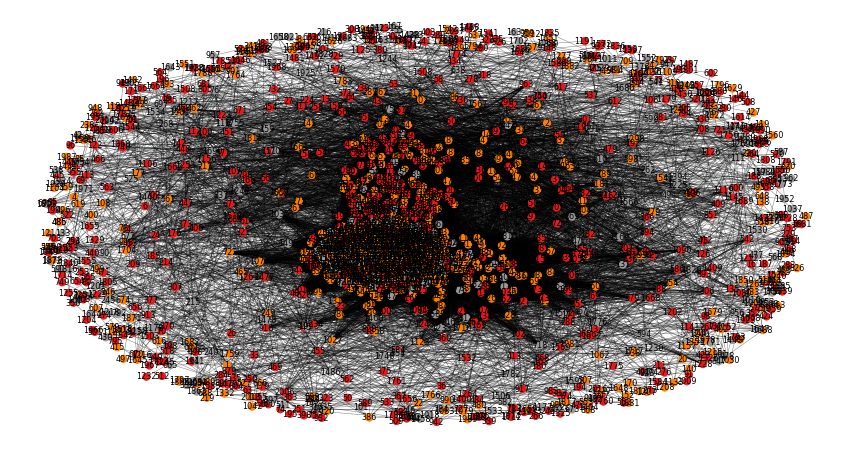

In [221]:
tweets = df3['Tweets'].tolist()
embeddings_ = embed(tweets)
cosine_sim = cosine_similarity(embeddings_)
threshold = 0.5

G = nx.Graph()
edge_indices = []
for i, tweet_i in enumerate(df3['Tweets']):
    for j, tweet_j in enumerate(df3['Tweets']):
        if i != j:
            similarity = cosine_sim[i, j]
            if similarity > threshold:
                G.add_edge(i, j, weight=similarity)
                edge_indices.extend([i, j])
edge_indices = list(set(edge_indices)) 
cosine_sim_subset = cosine_sim[edge_indices][:, edge_indices]
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim_subset)
node_colors = [kmeans.labels_[i] for i in range(len(edge_indices))]

fig, ax = plt.subplots(figsize=(15, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.axis("off")
plt.savefig("marukyan.png")
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df3["Tweets"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
most_common_topic = pd.Series(kmeans.labels_).value_counts().idxmax()

#print(f"The most common topic in the tweets is cluster {most_common_topic}.")

In [222]:
cluster_index = kmeans.labels_ == 2
tweets_in_cluster = df3[cluster_index]['Tweets']

vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(tweets_in_cluster)
word_counts = np.asarray(X.sum(axis=0)).squeeze()
df_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "count": word_counts})
df_word_counts_sorted = df_word_counts.sort_values(by="count", ascending=False)

# print the top 10 words in the cluster
print("The most common words in the tweets in the cluster:")
print(df_word_counts_sorted.head(10))

The most common words in the tweets in the cluster:
               word  count
3236             we    250
355         armenia    193
3008          today    102
358        armenian    101
338             are     88
385              as     83
3263           will     82
2983           this     75
546   brightarmenia     71
3230            was     71


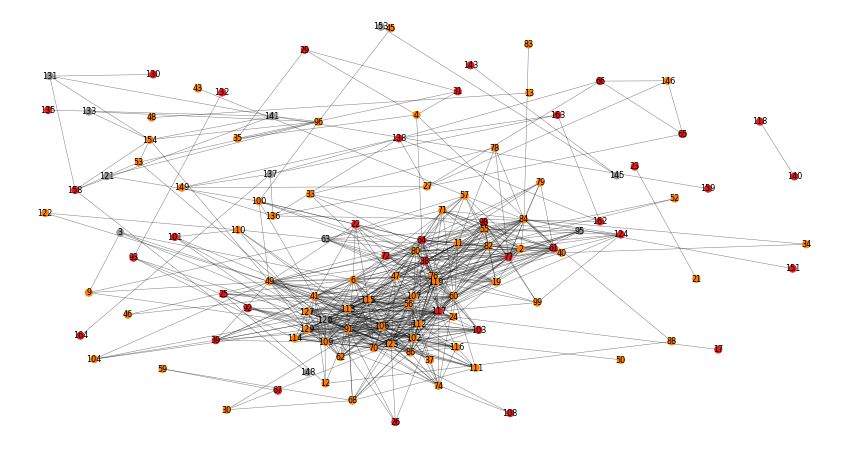

In [223]:
tweets = df4['Tweets'].tolist()
embeddings_ = embed(tweets)
cosine_sim = cosine_similarity(embeddings_)
threshold = 0.5

G = nx.Graph()
edge_indices = []
for i, tweet_i in enumerate(df4['Tweets']):
    for j, tweet_j in enumerate(df4['Tweets']):
        if i != j:
            similarity = cosine_sim[i, j]
            if similarity > threshold:
                G.add_edge(i, j, weight=similarity)
                edge_indices.extend([i, j])

edge_indices = list(set(edge_indices)) 
cosine_sim_subset = cosine_sim[edge_indices][:, edge_indices]
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim_subset)

node_colors = [kmeans.labels_[i] for i in range(len(edge_indices))]

fig, ax = plt.subplots(figsize=(15, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.axis("off")
plt.savefig("mirzoyan.png")
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df4["Tweets"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
most_common_topic = pd.Series(kmeans.labels_).value_counts().idxmax()

#print(f"The most common topic in the tweets is cluster {most_common_topic}.")

In [224]:
cluster_index = kmeans.labels_ == 2
tweets_in_cluster = df4[cluster_index]['Tweets']

vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(tweets_in_cluster)
word_counts = np.asarray(X.sum(axis=0)).squeeze()
df_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "count": word_counts})
df_word_counts_sorted = df_word_counts.sort_values(by="count", ascending=False)

# print the top 10 words in the cluster
print("The most common words in the tweets in the cluster:")
print(df_word_counts_sorted.head(10))

The most common words in the tweets in the cluster:
                word  count
25           armenia     13
66            cyprus      6
192         security      6
26          armenian      5
233               we      5
62       cooperation      4
163           people      4
59   congratulations      3
22       appreciates      3
219          turkish      3


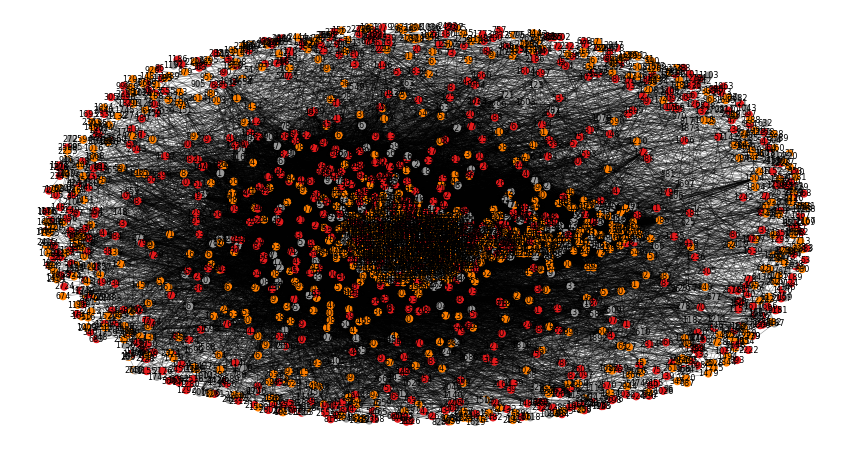

In [231]:
tweets = df['Tweets'].tolist()
embeddings_ = embed(tweets)

cosine_sim = cosine_similarity(embeddings_)
threshold = 0.5

G = nx.Graph()
edge_indices = []
for i, tweet_i in enumerate(df['Tweets']):
    for j, tweet_j in enumerate(df['Tweets']):
        if i != j:
            similarity = cosine_sim[i, j]
            if similarity > threshold:
                G.add_edge(i, j, weight=similarity)
                edge_indices.extend([i, j])

edge_indices = list(set(edge_indices))
cosine_sim_subset = cosine_sim[edge_indices][:, edge_indices]
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim_subset)

node_colors = [kmeans.labels_[i] for i in range(len(edge_indices))]
fig, ax = plt.subplots(figsize=(15, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.axis("off")
plt.savefig("marukyan.png")
plt.show()

In [ ]:
stop_words = ["english", "https", "co", "the", "of", "in", "amp", "to", "and", "with","this","have", "for", "is", "us","by", "be", "my", "was", "all","via", "on", "our","as", "are","that", "at", "in", "an", "it"]
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Tweets"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
most_common_topic = pd.Series(kmeans.labels_).value_counts().idxmax()

#print(f"The most common topic in the tweets is cluster {most_common_topic}.")

In [238]:
cluster_index = kmeans.labels_ == 2
tweets_in_cluster = df[cluster_index]['Tweets']

vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(tweets_in_cluster)
word_counts = np.asarray(X.sum(axis=0)).squeeze()
df_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "count": word_counts})
df_word_counts_sorted = df_word_counts.sort_values(by="count", ascending=False)

# print the top 10 words in the cluster
print("The most common words in the tweets in the cluster:")
print(df_word_counts_sorted.head(15))

The most common words in the tweets in the cluster:
               word  count
4222             we    370
461         armenia    356
465        armenian    161
4257           will    146
3920          today    132
2905         people    104
2504        meeting     89
490         artsakh     81
3023      president     80
1784          great     72
687   brightarmenia     72
4354            you     69
1103            day     66
2154         issues     64
2972      political     62


### In this notebook I have decided to combine sentence embeddings and Network analysis, since they are all in the same theme of clustering data
### When doing Network Analysis I have also pulled out the most common words from each Network which output the most common words in main cluster and used it after each of graphs in my report